## Displaying Intermediate Activations

The goal here is to see how an input image is decomposed by the various filters that are learned by the network. 

### Load Previously Trained Model

In [1]:
from keras.models import load_model

model = load_model('cats_and_dogs_small_2.h5')
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 15, 15, 128)      

### Load Test Image

In [2]:
import os



base_dir = './'

train_dir = os.path.join(base_dir, 'train') 
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs') 

img_path = test_cats_dir + '/' + 'cat.1500.jpg'

In [3]:
from keras.preprocessing import image
import numpy as np


img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor.shape

(150, 150, 3)

In [4]:
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.0
img_tensor.shape

(1, 150, 150, 3)

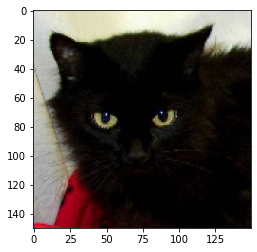

In [5]:
import matplotlib.pyplot as plt


plt.imshow(img_tensor[0])
plt.show()

In [6]:
from keras import models


layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

### The Model Class

What sets the Model class apart is that, unlike sequential, it allows for models with multiple outputs.

In [7]:
activations = activation_model.predict(img_tensor)
len(activations)

8

In [8]:
first_layer_activation = activations[0]
first_layer_activation.shape

(1, 148, 148, 32)

#### First Activation of First Layer

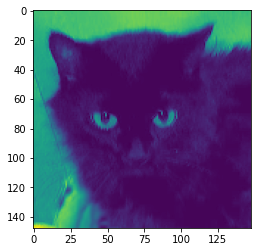

In [9]:
plt.imshow(first_layer_activation[0, :, :, 0])
plt.show()

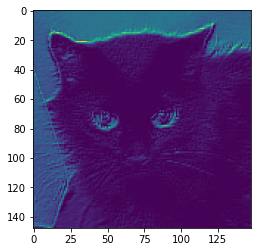

In [10]:
plt.imshow(first_layer_activation[0, :, :, 1])
plt.show()

## Plotting All Activations of First Layer

In [11]:
from itertools import product



def plot_activation_layer(activation_layer, layer_name):
    n_cols = 16
    
    # shape of activation_layer = (1, size, size, number_of_kernels); shape[-1] = number_of_kernels
    n_kernels = activation_layer.shape[-1] 
    
    # (1, size, size, number_of_kernels)[1] = size
    size = activation_layer.shape[1] 
    
    n_rows = n_kernels // n_cols
    display_grid = np.zeros((size * n_rows, size * n_cols))
    
    kernel_id = 0
    for row, col in product(range(n_rows), range(n_cols)):
        channel_image = activation_layer[0, :, :, kernel_id]
        channel_image = make_visually_appealing(channel_image)
        
        display_grid[row * size : (row + 1) * size, 
                     col * size : (col + 1) * size] = channel_image
        
        kernel_id += 1
    
    scale = 1.0 / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')


def make_visually_appealing(channel_image):
    channel_image -= channel_image.mean()
    std = channel_image.std()

    if np.isnan(std) or std == 0:
        std = 1

    channel_image /= std

    channel_image *= 64
    channel_image += 128
    channel_image = np.clip(channel_image, 0, 255).astype('uint8')
    return channel_image


def plot_all_layers(activation_list):        
    for idx, act in enumerate(activation_list):
        plot_activation_layer(act, idx)

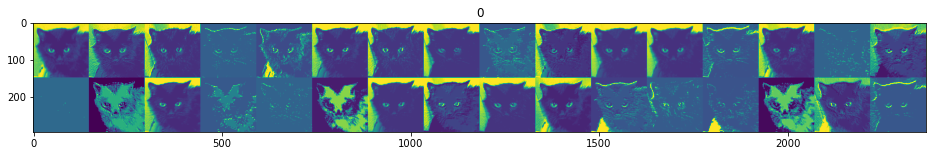

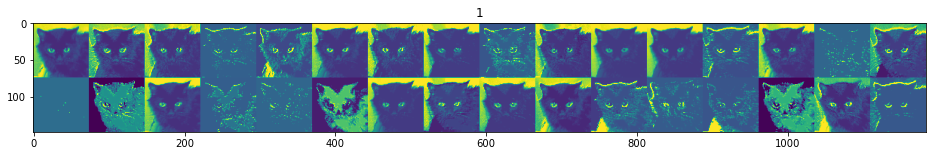

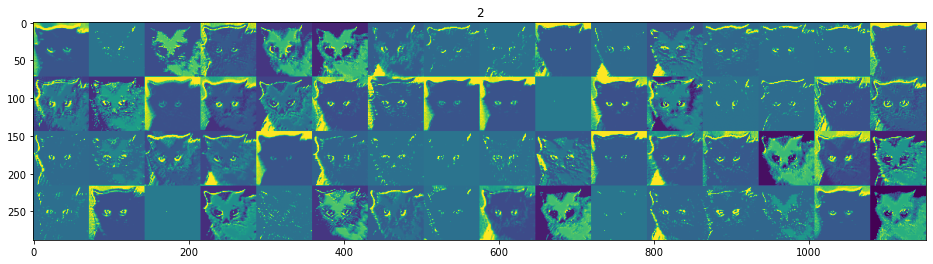

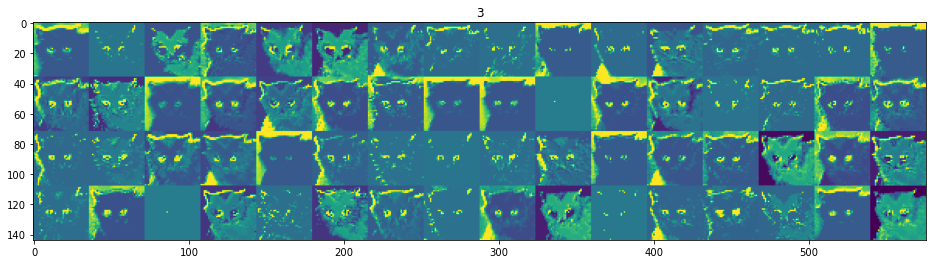

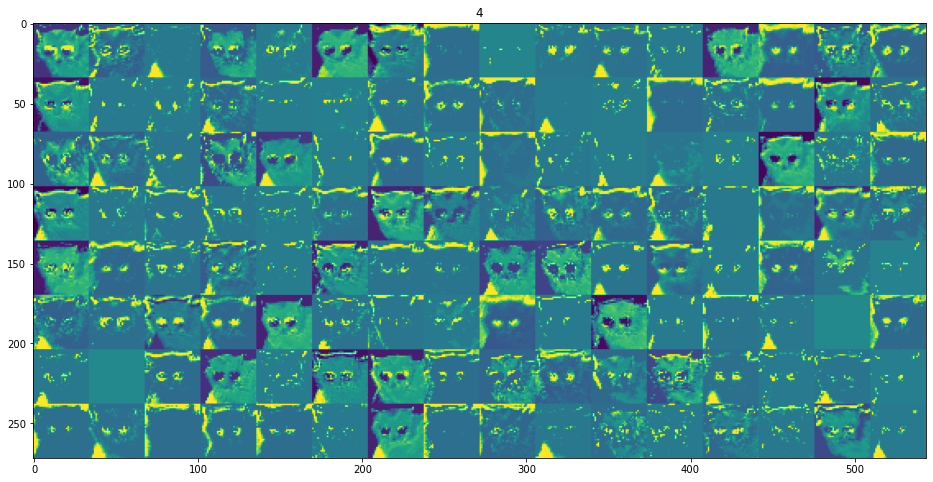

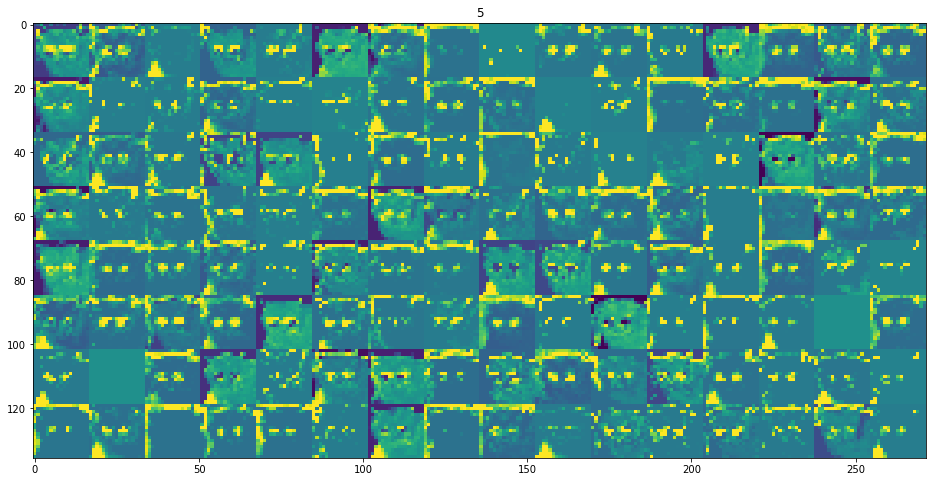

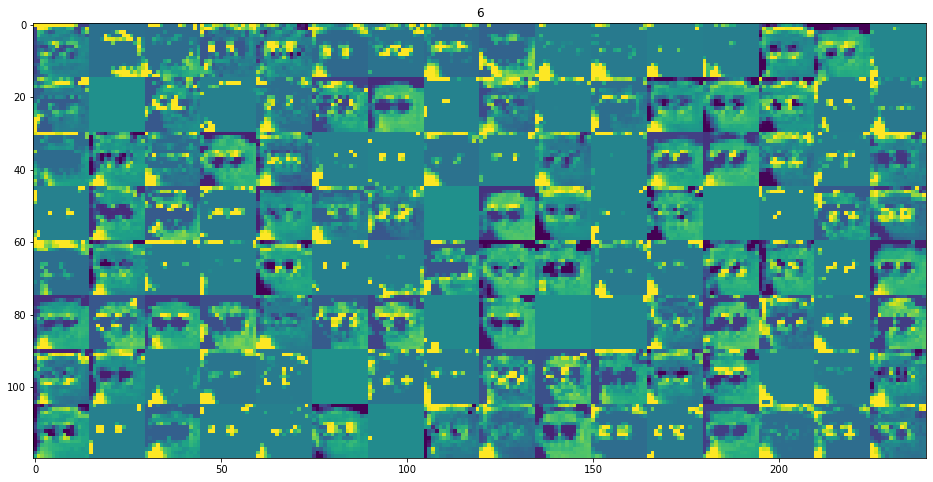

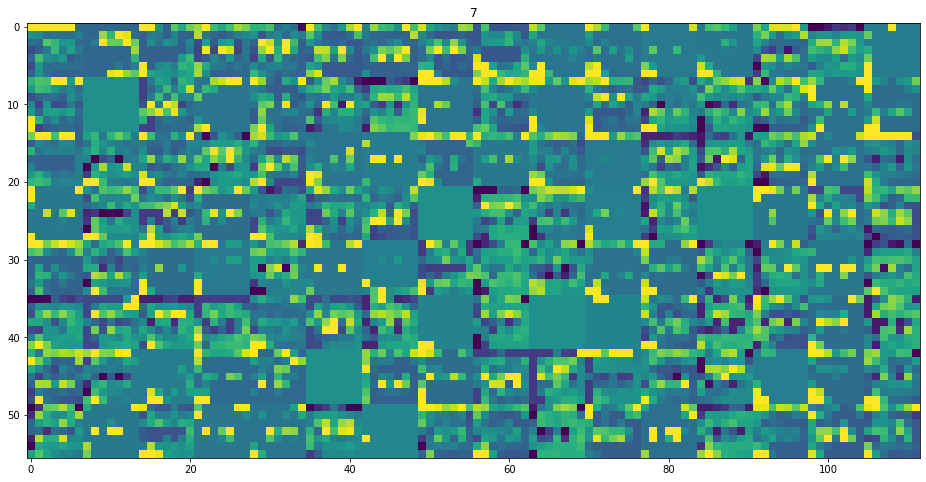

In [12]:
plot_all_layers(activations)